In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import fsspec

## Monthly Precipitation

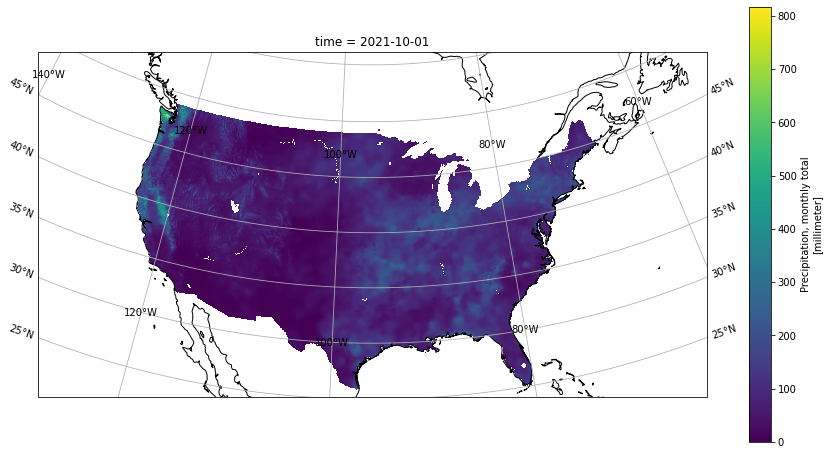

In [2]:
# url = 'https://nclimgridwesteurope.blob.core.windows.net/nclimgrid/nclimgrid-monthly/nclimgrid_prcp.nc#mode=bytes'
# xrd = xr.open_dataset(url)

url = 'https://nclimgridwesteurope.blob.core.windows.net/nclimgrid/nclimgrid-monthly/nclimgrid_prcp.nc'
with fsspec.open(url) as fo:
    xrd = xr.open_dataset(fo)
    t = np.datetime64('2021-10', 'ns')
    buf = 3

    central_lon = (xrd.attrs['geospatial_lon_min']+ xrd.attrs['geospatial_lon_max']) / 2
    central_lat = (xrd.attrs['geospatial_lat_min'] + xrd.attrs['geospatial_lat_max']) / 2
    extent = [xrd.attrs['geospatial_lon_min'] - buf,
            xrd.attrs['geospatial_lon_max'] + buf,
            xrd.attrs['geospatial_lat_min'] - buf,
            xrd.attrs['geospatial_lat_max'] + buf]

    plt.figure(figsize=(15,8))
    ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=central_lon.item(),
                                                central_latitude=central_lat.item()))
    ax.set_extent(extent)
    prcp = xrd.prcp.sel(time=t).plot.imshow(ax=ax, transform=ccrs.PlateCarree())
    # prcp.set_clim(0, 700)
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    # plt.savefig('img/prcp_monthly_2021-10.jpg')
    plt.show()

## Monthly Average Temperature

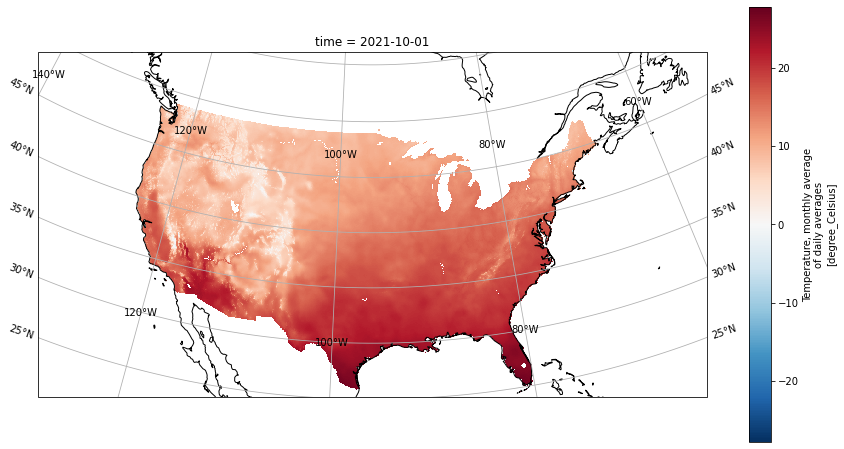

In [2]:
url = 'https://www.ncei.noaa.gov/data/nclimgrid-monthly/access/nclimgrid_tavg.nc'
with fsspec.open(url) as fobj:
    xrd = xr.open_dataset(fobj)
    
    t = np.datetime64('2021-10', 'ns')
    buf = 3

    central_lon = (xrd.attrs['geospatial_lon_min']+ xrd.attrs['geospatial_lon_max']) / 2
    central_lat = (xrd.attrs['geospatial_lat_min'] + xrd.attrs['geospatial_lat_max']) / 2
    extent = [xrd.attrs['geospatial_lon_min'] - buf,
            xrd.attrs['geospatial_lon_max'] + buf,
            xrd.attrs['geospatial_lat_min'] - buf,
            xrd.attrs['geospatial_lat_max'] + buf]

    plt.figure(figsize=(15,8))
    ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=central_lon.item(),
                                                central_latitude=central_lat.item()))
    ax.set_extent(extent)
    tavg = xrd.tavg.sel(time=t).plot.imshow(ax=ax, transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    plt.show()